In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [12]:
data = pd.read_csv(r'E:\python-learning\file\Life Expectancy Data.csv')

In [13]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [14]:
imputer = SimpleImputer(strategy='median')

continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[continuous_columns] = imputer.fit_transform(data[continuous_columns])
label_encoder = LabelEncoder()
data['Status'] = label_encoder.fit_transform(data['Status'])
print(imputer.fit_transform(data[continuous_columns]))

# data.info()

[[2.015e+03 6.500e+01 2.630e+02 ... 1.730e+01 4.790e-01 1.010e+01]
 [2.014e+03 5.990e+01 2.710e+02 ... 1.750e+01 4.760e-01 1.000e+01]
 [2.013e+03 5.990e+01 2.680e+02 ... 1.770e+01 4.700e-01 9.900e+00]
 ...
 [2.002e+03 4.480e+01 7.300e+01 ... 1.300e+00 4.270e-01 1.000e+01]
 [2.001e+03 4.530e+01 6.860e+02 ... 1.700e+00 4.270e-01 9.800e+00]
 [2.000e+03 4.600e+01 6.650e+02 ... 1.120e+01 4.340e-01 9.800e+00]]


In [15]:
data[continuous_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   float64
 1   Life expectancy                  2938 non-null   float64
 2   Adult Mortality                  2938 non-null   float64
 3   infant deaths                    2938 non-null   float64
 4   Alcohol                          2938 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2938 non-null   float64
 7   Measles                          2938 non-null   float64
 8    BMI                             2938 non-null   float64
 9   under-five deaths                2938 non-null   float64
 10  Polio                            2938 non-null   float64
 11  Total expenditure                2938 non-null   float64
 12  Diphtheria          

In [16]:
from sklearn.preprocessing import StandardScaler
X = data.drop(columns=['Life expectancy ', 'Country', 'Year']) 
y = data['Life expectancy ']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.45939851,  0.79211913,  0.26882378, ...,  2.77538573,
        -0.73797341, -0.58501698],
       [ 0.45939851,  0.85660141,  0.28578638, ...,  2.81997792,
        -0.75260009, -0.61564876],
       [ 0.45939851,  0.83242056,  0.30274898, ...,  2.86457011,
        -0.78185344, -0.64628054],
       ...,
       [ 0.45939851, -0.73933497, -0.04498439, ..., -0.79198947,
        -0.99150247, -0.61564876],
       [ 0.45939851,  4.20161958, -0.04498439, ..., -0.70280509,
        -0.99150247, -0.67691233],
       [ 0.45939851,  4.0323536 , -0.05346569, ...,  1.41532393,
        -0.95737356, -0.67691233]])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1.0998622448979596
Mean Squared Error (MSE): 2.7819431819727862
Root Mean Squared Error (RMSE): 1.6679158198100965


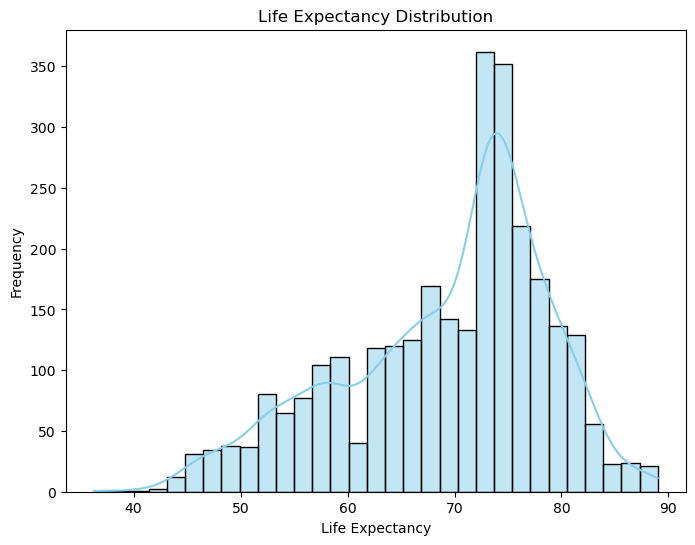

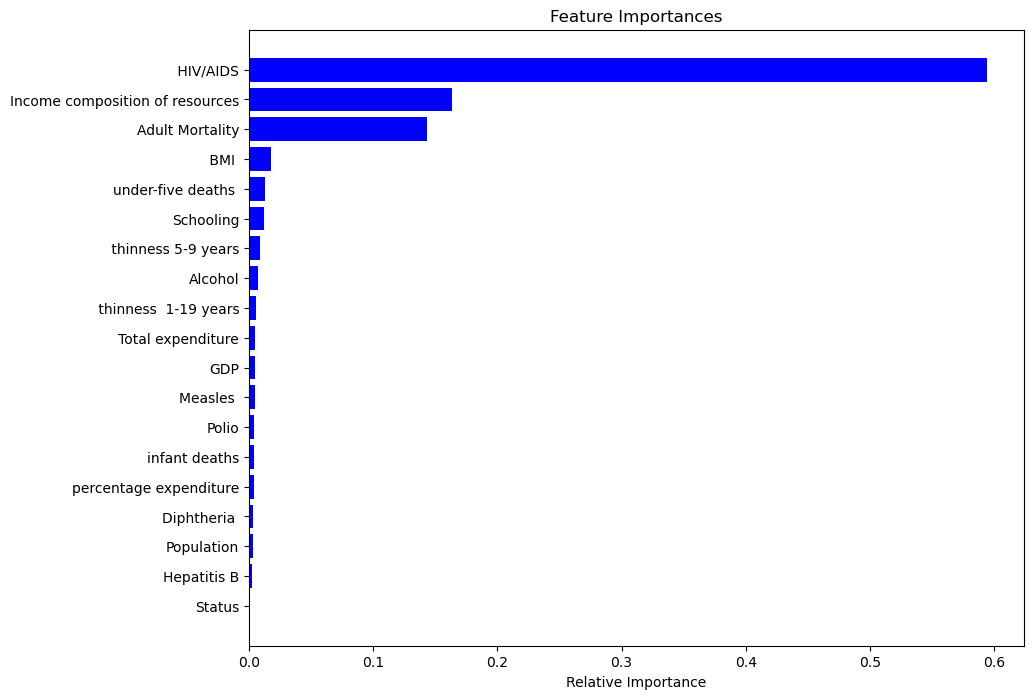

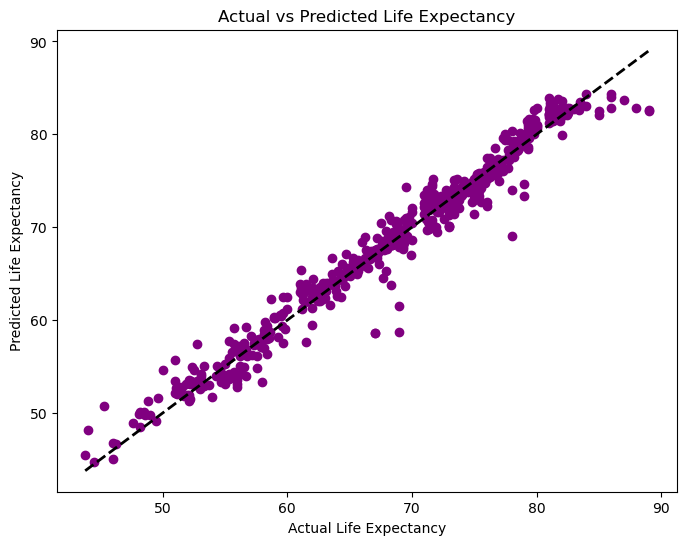

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['Life expectancy '], kde=True, color='skyblue')
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()


importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()
